In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Predict_BMI.csv')

In [4]:
data.describe()

,Height M,Weight kg,BMI,%Fat
count,92.000000,92.000000,92.000000,92.000000
mean,1.511921,47.865091,20.705779,26.961957
std,0.074101,13.076789,4.325132,7.142888
min,1.333500,29.256710,14.986302,15.600000
25%,1.460500,38.952247,17.708670,21.075000
50%,1.498600,45.472638,19.478923,25.500000
75%,1.570037,52.701767,22.736931,31.975000
max,1.663700,87.543333,34.461025,46.000000


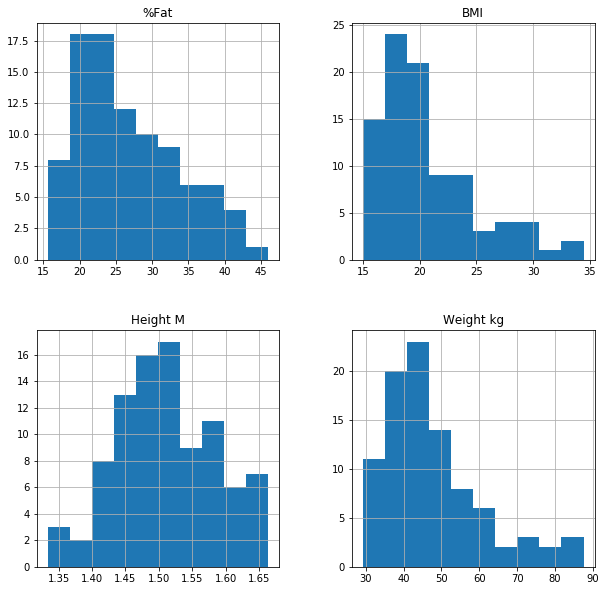

In [5]:
data.hist(figsize=(10,10));

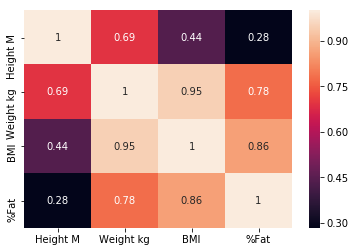

In [6]:
sns.heatmap(data.corr(), annot=True)

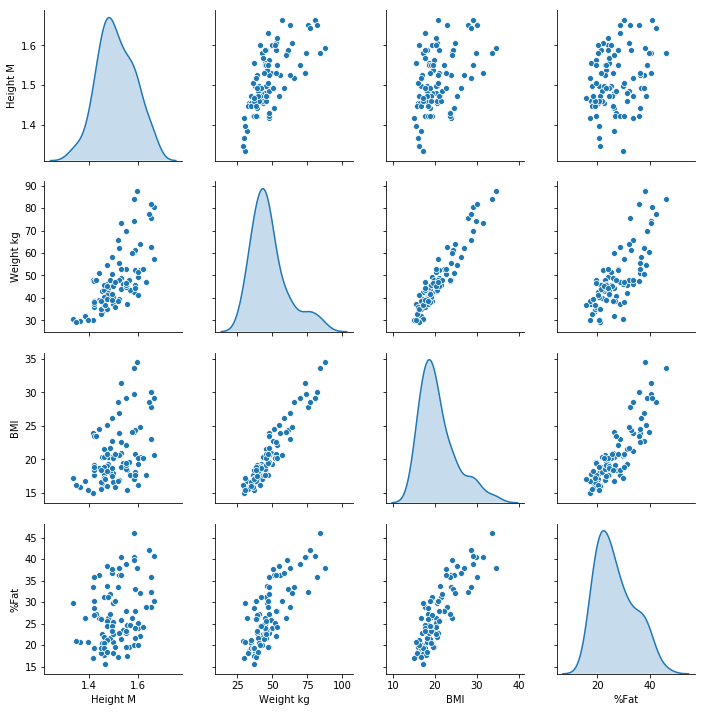

In [7]:
sns.pairplot(data, diag_kind = 'kde') # ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [15]:
data['BMI_val'] = data.BMI > 18.5

In [21]:
data['BMI_val'] = data.BMI_val.replace(True,1)
data.head(2)

,Height M,Weight kg,BMI,%Fat,BMI_val
0,1.6002,49.441572,19.308287,23.9,1.0
1,1.6510,62.595751,22.964168,28.8,1.0


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
s = StandardScaler()
new_data = pd.DataFrame(s.fit_transform(data[['Height M', 'Weight kg', 'BMI', '%Fat']]), columns=['Height M', 'Weight kg', 'BMI', '%Fat']).head()

In [25]:
new_data.head()

,Height M,Weight kg,BMI,%Fat
0,1.197854,0.121216,-0.324880,-0.431021
1,1.887158,1.132646,0.525016,0.258735
2,1.887158,2.144076,1.646888,0.765494
3,0.250060,0.086339,0.049199,-0.163565
4,-0.783897,-0.367060,-0.076098,-0.628094


In [28]:
x = data[['Height M', 'Weight kg']]

In [30]:
y = data['BMI_val']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
train_score = []
test_score = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [45]:
train_score

[1.0,
 0.9180327868852459,
 0.9344262295081968,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442]

In [46]:
test_score

[0.7096774193548387,
 0.7419354838709677,
 0.7741935483870968,
 0.7419354838709677,
 0.8064516129032258,
 0.7741935483870968,
 0.8064516129032258,
 0.8064516129032258,
 0.8387096774193549,
 0.8064516129032258,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549]

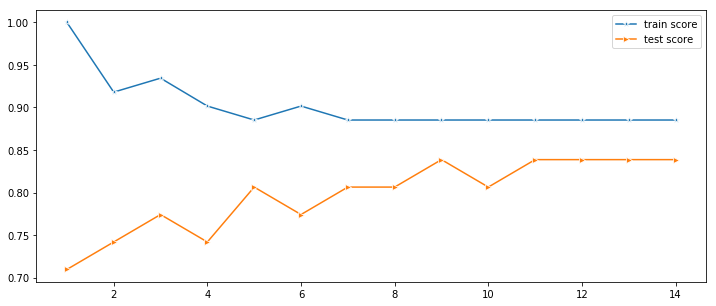

In [61]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15), train_score, marker="*", label="train score")
sns.lineplot(range(1,15), test_score, marker=">", label="test score");

In [62]:
max(test_score)

0.8387096774193549

In [63]:
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [64]:
knn.score(x_train, y_train)

0.8852459016393442

In [65]:
from sklearn.metrics import confusion_matrix

In [77]:
y_pred = knn.predict(x_test)
cf = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, margins=True)

col_0,0.0,1.0,All
BMI_val,,,
0.0,8,1,9
1.0,4,18,22
All,12,19,31


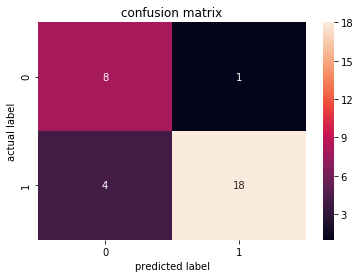

In [81]:
sns.heatmap(pd.DataFrame(cf),annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()